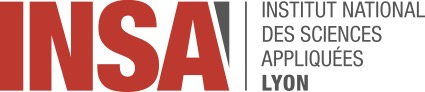
# P2I7: Chapitre 5 méthodes numériques
## Convergence des schémas numériques pour les EDOs
Camille Carvalho (INSA/ICJ)

In [1]:
#libraries to import
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import sympy as sp

On regarde toujours le système de masses de la séance précédente 

$$ \ddot{U}(t) + KU(t) = 0, $$
avec 
$$ K = \begin{bmatrix}
 2 & -1 & 0 & 0 & 0 \\
 -1 & 2 & -1 & 0 & 0 \\
 0 & -1 & 2 & -1 & 0 \\
 0 & 0 & -1 & 2 & -1 \\
 0 & 0 & 0 & -1 & 2
\end{bmatrix}, \quad \quad U(t) = \begin{pmatrix} {u_1(t)} \\ {u_2(t)} \\ {u_3(t)}\\ {u_4(t)}\\{u_5(t)} \end{pmatrix} $$
Pour pouvoir estimer la convergence des schémas numériques sur ce problème, nous allons calculer la solution de ce problème à la main. Pour cela, remarquons que les valeurs propres de la matrice $K$ sont $\lambda_1 = 1, \lambda_2 = 2, \lambda_3 = 3, \lambda_4 = 2-\sqrt{3}, \lambda_5 = 2+\sqrt{3}$ et les vecteurs propres correspondants
$$ 
W_1 = \begin{pmatrix} 1 \\ 1 \\ 0\\ -1\\-1 \end{pmatrix}, \quad  
W_2 = \begin{pmatrix} 1 \\ 0 \\ -1\\ 0\\1 \end{pmatrix}, \quad
W_3 = \begin{pmatrix} -1 \\ 1 \\ 0\\ -1\\1 \end{pmatrix}, \quad
W_4 = \begin{pmatrix} 1 \\ \sqrt{3} \\ 2\\ \sqrt{3}\\1 \end{pmatrix}, \quad
W_5 = \begin{pmatrix} 1 \\ -\sqrt{3} \\ 2\\ \sqrt{3}\\1 \end{pmatrix}.
$$
Si on développe la solution sur les vecteurs propres en écrivant
$$ U(t) = \sum_{i=1}^5 \beta_i(t) W_i, $$
alors chaque composante $\beta_i(t)$ vérifie
$$ \ddot{\beta}_i(t) + \lambda_i \beta_i(t) = 0. $$
Et l'on trouve donc
$$ \beta_i(t) = c_i \sin(\sqrt{\lambda_i} t) + d_i \cos(\sqrt{\lambda_i} t), $$
où les $c_i$ et $d_i$ sont déterminés par la condition initiale. La condition initiale
$$ u_1(0) = 1, ~~u_2(0) = 0.9\sqrt{3}, ~~u_3(0) = 2, ~~u_4(0) = 0.9\sqrt{3}, ~~u_5(0) = 1, $$
$$ \dot{u}_1(0) = \dot{u}_2(0) = \dot{u}_3(0) = \dot{u}_4(0) =  \dot{u}_5(0) = 0. $$
correspond à $d_4 = 0.95$ et $d_5 = 0.05$ et tous les autres coefficients nuls. La solution s'écrit donc
$$ U(t) = 0.95\cos(\sqrt{\lambda_4}t)W_4 +  0.05\cos(\sqrt{\lambda_5}t)W_5. $$

**Question 1.** Ajoutez dans votre programme de la séance précédente une partie qui calcule la solution exacte à chaque pas de temps et la différence en norme euclidienne avec la solution approchée. Calculer le maximum de cette différence sur tous les pas de temps. 

In [2]:
# ELEMENTS de code du chapitre 4: 
from numpy import linalg as la
B = np.matrix([[0, 0, 0, 0, 0, -1., 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, -1., 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, -1., 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, -1., 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, -1.],
     [2., -1., 0, 0, 0, 0, 0, 0, 0, 0],
     [-1., 2., -1., 0, 0, 0, 0, 0, 0, 0],
     [0, -1., 2., -1., 0, 0, 0, 0, 0, 0],
     [0, 0, -1., 2., -1., 0, 0, 0, 0, 0],
     [0, 0, 0, -1., 2., 0, 0, 0, 0, 0]])
a = 0
b = 100
N = 1000
θ = 0.1
V0 = [[1], [0.9*np.sqrt(3)], [2], [0.9*np.sqrt(3)], [1], [0], [0], [0], [0], [0]]
K = np.matrix([
     [2., -1., 0, 0, 0],
     [-1., 2., -1., 0, 0],
     [0, -1., 2., -1., 0],
     [0, 0, -1., 2., -1.],
     [0, 0, 0, -1., 2.]])

# Fonction calculant la solution discrète et l'énergie discrète
def theta_schema(B, K, a, b, V0, N, θ):
    '''
    function that approximate the initial value problem (IVP) v'= -Bv
    a < t < b, v(a) = V0, using a θ-schema
    
    Parameters
    ==========
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution v, as an array of values
    The energy E, as an array of values
    '''
    
    Δt = (b-a)/ N
    t = [a + i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded
    v = np.zeros((10, N+1))  
    v[:, 0:1] = V0
    C = np.eye(10) - Δt * θ * B
    D = np.eye(10) + Δt * (1. - θ) * B
    inv_CD = la.inv(C)*D
    Energie = lambda v, i :  0.5 * np.dot(v[5:,i], v[5:,i])+ 0.5 * np.dot(v[0:5,i], (K*v[0:5,i:i+1]))
    E = np.zeros(N+1) 
    E[0] = Energie(v,0)
    for i in range(1, N+1):
        v[:, i:i+1] = inv_CD*v[:, i-1:i] 
        E[i] = Energie(v, i)
    return t, v, E

# comparison approximation and exact solution
t, v, E = theta_schema(B, K, a, b, V0, N, θ)

In [3]:
# ELEMENTS de code du chapitre 4: 
from numpy import linalg as la
B = np.matrix([[0, 0, 0, 0, 0, -1., 0, 0, 0, 0],
     [0, 0, 0, 0, 0, 0, -1., 0, 0, 0],
     [0, 0, 0, 0, 0, 0, 0, -1., 0, 0],
     [0, 0, 0, 0, 0, 0, 0, 0, -1., 0],
     [0, 0, 0, 0, 0, 0, 0, 0, 0, -1.],
     [2., -1., 0, 0, 0, 0, 0, 0, 0, 0],
     [-1., 2., -1., 0, 0, 0, 0, 0, 0, 0],
     [0, -1., 2., -1., 0, 0, 0, 0, 0, 0],
     [0, 0, -1., 2., -1., 0, 0, 0, 0, 0],
     [0, 0, 0, -1., 2., 0, 0, 0, 0, 0]])
K = np.matrix([
     [2., -1., 0, 0, 0],
     [-1., 2., -1., 0, 0],
     [0, -1., 2., -1., 0],
     [0, 0, -1., 2., -1.],
     [0, 0, 0, -1., 2.]])

# Fonction calculant la solution discrète et l'énergie discrète
def theta_schema(B, K, Δt, T, V0, N, θ):
    '''
    function that approximate the initial value problem (IVP) v'= -Bv
    a < t < b, v(a) = V0, using a θ-schema
    
    Parameters
    ==========
    a: float number, lower bound time interval
    b: float number, upper bound time interval
    N: integer, number of subintervals
    
    Returns
    =======
    The sampled time t, as an array of values
    The solution v, as an array of values
    The energy E, as an array of values
    '''
    N = int(T/Δt)
    t = [i * Δt for i in range(N+1)] #careful in range, the endpoint is excluded
    v = np.zeros((10, N+1))  
    v[:, 0:1] = V0
    C = np.eye(10) - Δt * θ * B
    D = np.eye(10) + Δt * (1. - θ) * B
    inv_CD = la.inv(C)*D
    Energie = lambda v, i :  0.5 * np.dot(v[5:,i], v[5:,i])+ 0.5 * np.dot(v[0:5,i], (K*v[0:5,i:i+1]))
    E = np.zeros(N+1) 
    E[0] = Energie(v,0)
    for i in range(1, N+1):
        v[:, i:i+1] = inv_CD*v[:, i-1:i] 
        E[i] = Energie(v, i)
    return t, v, E

# comparison approximation and exact solution
T = 10
Δt = 1/10
θ = 0.5
V0 = [[1], [0.9*np.sqrt(3)], [2], [0.9*np.sqrt(3)], [1], [0], [0], [0], [0], [0]]
λ4 = 2 - np.sqrt(3)
λ5 = 2 + np.sqrt(3)
W4 = [1, np.sqrt(3), 2, np.sqrt(3), 1]
W5 = [1, -np.sqrt(3), 2, -np.sqrt(3), 1]
solution_exact = np.zeros((5, int(T/Δt)+1))

t, v, E = theta_schema(B, K, Δt, T, V0, N, θ)

for i in range(0,5):
    solution_exact[i,:]  = [0.95*np.cos(np.sqrt(λ4)*u)*W4[i]+ 0.05*np.cos(np.sqrt(λ5)*u)*W5[i] for u in t]

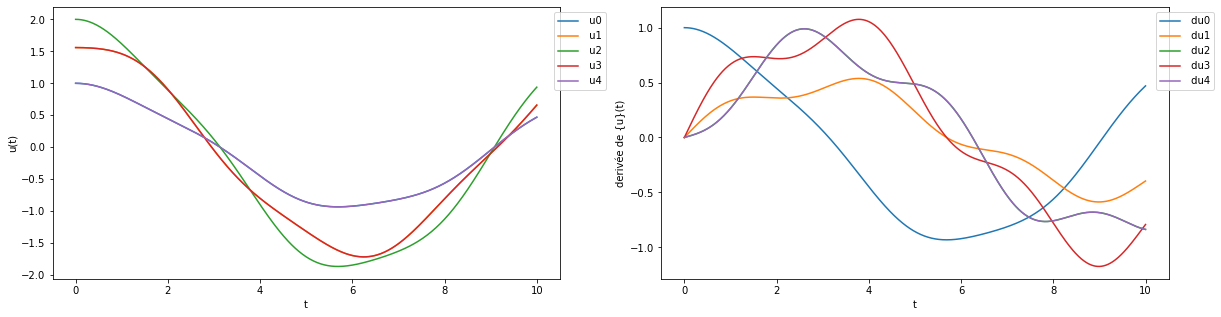

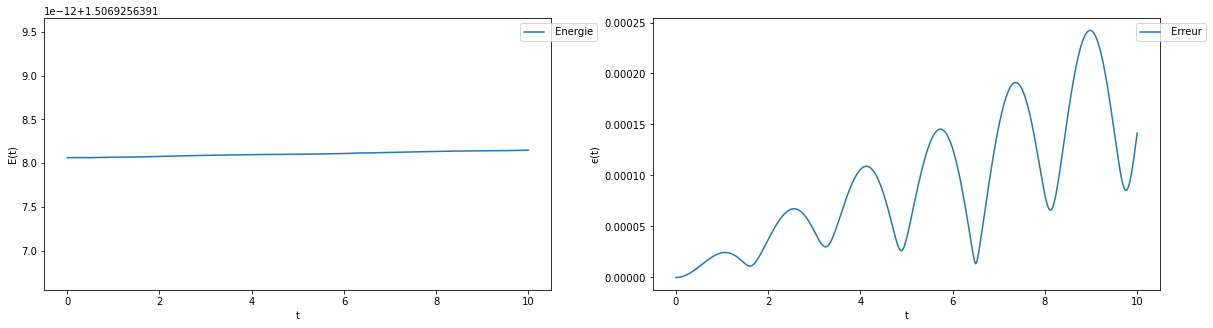

In [13]:
Error = la.norm(v[0:5,:] - solution_exact, axis = 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
for i in range(0,5):
    ax1.plot(t, v[i, :], label = f' u{i}')
    ax2.plot(t, v[i+4, :], label = f' du{i}')

ax1.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
ax1.set_xlabel('t')
ax1.set_ylabel('u(t)')
ax2.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
ax2.set_xlabel('t')
ax2.set_ylabel('derivée de {u}(t)')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
ax1.plot(t, E, label = f' Energie')
ax1.set_xlabel('t')
ax1.set_ylabel('E(t)')
ax1.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))
ax2.plot(t, Error, label = f' Erreur')
ax2.set_xlabel('t')
ax2.set_ylabel('ϵ(t)')
ax2.legend(loc = 'upper right', bbox_to_anchor=(1.1, 1))

**Question 2.** Pour un temps de simulation $T=10$, notez l'évolution de cette erreur maximale en fonction du pas de temps pour la méthode d'Euler implicite (vous pourrez prendre les valeurs de $\Delta t$ suivantes : 1/2, 1/4, 1/8, 1/16, 1/32, 1/64). Faites un graphique en échelle logarithmique (voir la commande ``loglog`` de matplotlib) de cette évolution. Quelle est la pente approximative de la courbe obtenue ?

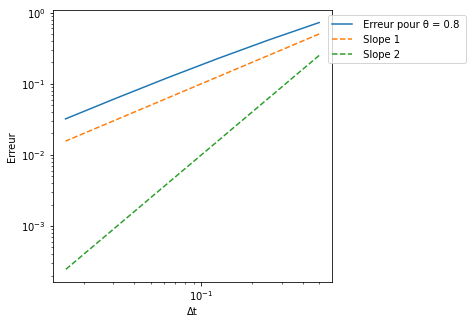

In [18]:
T = 10
ΔΔt = [1./2, 1./4, 1./8, 1./16, 1./32, 1./64] 
ΔΔt2 = [i**2 for i in ΔΔt] 
θ = 0.8
V0 = [[1], [0.9*np.sqrt(3)], [2], [0.9*np.sqrt(3)], [1], [0], [0], [0], [0], [0]]
λ4 = 2 - np.sqrt(3)
λ5 = 2 + np.sqrt(3)
W4 = [1, np.sqrt(3), 2, np.sqrt(3), 1]
W5 = [1, -np.sqrt(3), 2, -np.sqrt(3), 1]

Error_t = np.zeros(len(ΔΔt))
for i, δt in enumerate(ΔΔt):
    t, v, E = theta_schema(B, K, δt, T, V0, N, θ)
    solution_exact = np.zeros((5, int(T/δt)+1))
    for m in range(0,5):
        solution_exact[m,:]  = [0.95*np.cos(np.sqrt(λ4)*u)*W4[m]+ 0.05*np.cos(np.sqrt(λ5)*u)*W5[m] for u in t]
    Error_t[i] = np.max(la.norm(v[0:5,:] - solution_exact, axis = 0))

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
ax1.loglog(ΔΔt, Error_t, label = f' Erreur pour θ = {θ} ')
ax1.loglog(ΔΔt, ΔΔt, '--', label = f' Slope 1')
ax1.loglog(ΔΔt, ΔΔt2, '--', label = f' Slope 2')
ax1.set_xlabel('Δt')
ax1.set_ylabel('Erreur')
ax1.legend(loc = 'upper right', bbox_to_anchor=(1.5, 1))

On retrouve dans ce que l'erreur diminue avec $\Delta t$ ce qui traduit la convergence du schéma numérique. En fonction de la valeur de $\theta$ on trouve aussi l'ordre.

**Question 3.** Refaites cette expérience pour la méthode d'Euler explicite et la méthode de Crank-Nicolson.

In [ ]:
#changer la valeur de θ ci-dessus.

**Question 4.** Implémentez le schéma de Verlet et le schéma RK4 et comparez. Quelles sont les conditions de stabilité pour ces deux schémas ? (a-stabilité pour RK4).

In [ ]:
#utilisez le TD2 et le TD3 pour cela.

**Question 5.** Faites une simulation avec un $T$ grand et un pas de temps assez grand ($T = 40$, $\Delta t$ = 1/2, par exemple) en dessinant l'évolution de l'énergie. Commentez et comparez aux valeurs théoriques de stabilité.

In [ ]:
#changer le code ci-dessus.